In [1]:
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [3]:
TRAINING_DIR = "./data/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "./data/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1064 images belonging to 2 classes.
Found 312 images belonging to 2 classes.


In [5]:
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
107/107 [==============================] - 29s 267ms/step - loss: 0.5264 - acc: 0.7350 - val_loss: 0.1617 - val_acc: 0.9359
Epoch 2/15
107/107 [==============================] - 29s 273ms/step - loss: 0.2904 - acc: 0.8900 - val_loss: 0.1439 - val_acc: 0.9647
Epoch 3/15
107/107 [==============================] - 29s 271ms/step - loss: 0.2410 - acc: 0.9164 - val_loss: 0.1306 - val_acc: 0.9679
Epoch 4/15
107/107 [==============================] - 29s 268ms/step - loss: 0.2404 - acc: 0.9060 - val_loss: 0.0676 - val_acc: 0.9744
Epoch 5/15
107/107 [==============================] - 29s 270ms/step - loss: 0.2229 - acc: 0.9164 - val_loss: 0.0670 - val_acc: 0.9776
Epoch 6/15
107/107 [==============================] - 28s 265ms/step - loss: 0.2574 - acc: 0.8966 - val_loss: 0.0624 - val_acc: 0.9712
Epoch 7/15
107/107 [==============================] - 29s 272ms/step - loss: 0.1981 - acc: 0.9088 - val_loss: 0.0945 - val_acc: 0.9647
Epoch 8/15
107/107 [==============================] - 2

In [4]:
# model.save("model.h5")

In [5]:
# model = load_model("model.h5")
results={0:'without mask', 1:'mask'}
GR_dict={0:(0,0,255), 1:(0,255,0)}
rect_size = 4
cap = cv2.VideoCapture(0) 
haarcascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 
    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    
    if key == 27: 
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 21ms/step


In [25]:
mask = cv2.imread('with_mask.png')
no_mask = cv2.imread('without_mask.png')

(-0.5, 1679.5, 1049.5, -0.5)

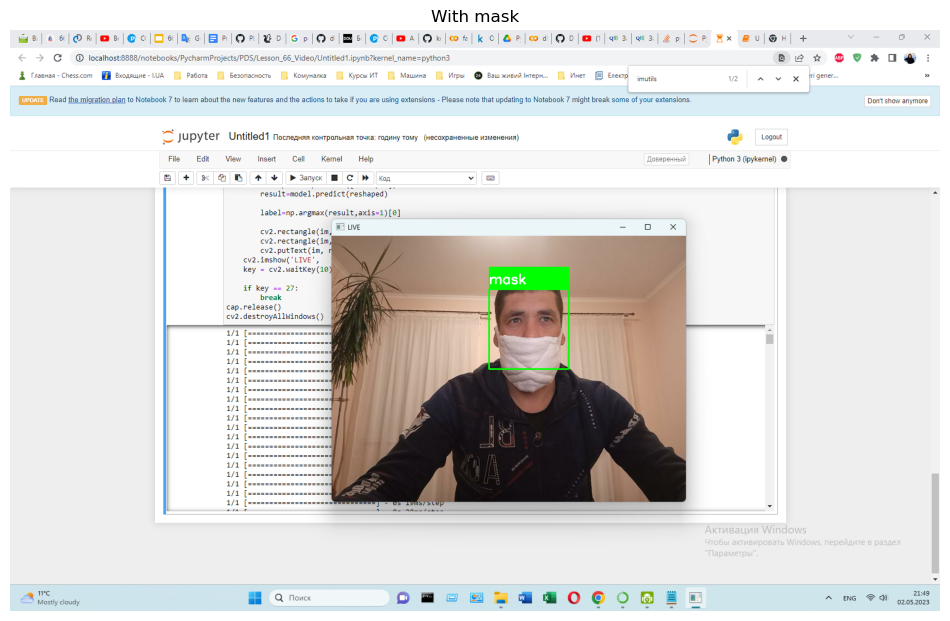

In [36]:
plt.figure(figsize=[12, 8])
# plt.subplot(121)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title("With mask")
plt.axis('off')

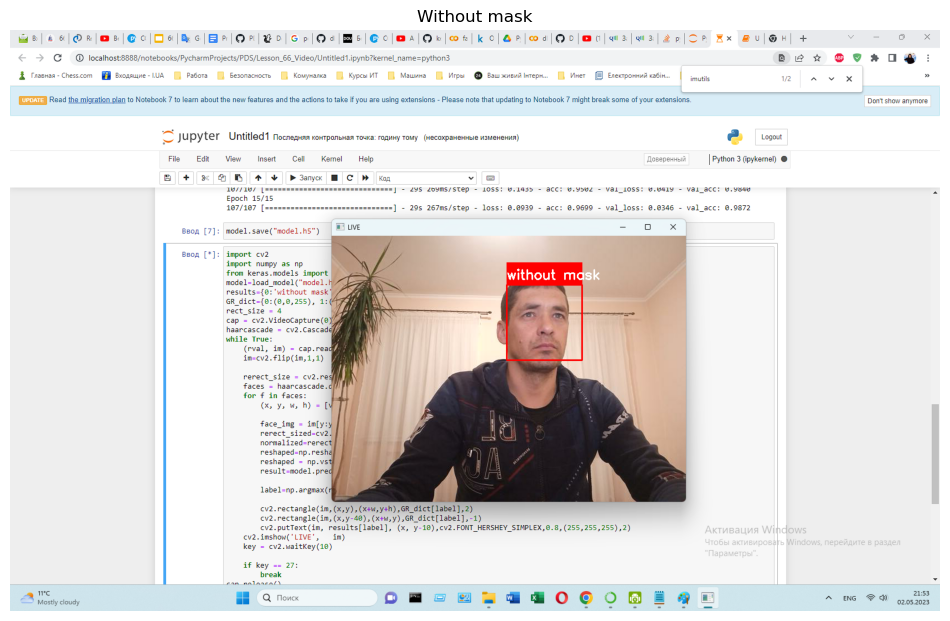

In [39]:
plt.figure(figsize=[12, 8])
plt.imshow(cv2.cvtColor(no_mask, cv2.COLOR_BGR2RGB))
plt.title("Without mask")
plt.axis('off');